# Confusion Matrix & Interpretation Plots (Quality: 5, 6, 7-8 Model)

## Load in Packages

In [86]:
library("ggplot2")
library("MASS")
library("caret")
library("magrittr")
library("dplyr")
library("tidyr")
library("lmtest")
library("popbio")
library("e1071")

## Load in Data


In [87]:
wine = read.csv('WineQT.csv')


In [88]:
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


## Recode Quality Variable into Three Bins

In [89]:
wine$qualityR <- NA
wine$qualityR [wine$quality==5] <- 0
wine$qualityR [wine$quality==6] <- 1
wine$qualityR [wine$quality==7] <- 2
wine$qualityR [wine$quality==8] <- 2

In [90]:
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1,0
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5,0


## Data Wrangling

In [91]:
summary(wine)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.600   Min.   :0.1200   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 7.100   1st Qu.:0.3925   1st Qu.:0.0900   1st Qu.: 1.900  
 Median : 7.900   Median :0.5200   Median :0.2500   Median : 2.200  
 Mean   : 8.311   Mean   :0.5313   Mean   :0.2684   Mean   : 2.532  
 3rd Qu.: 9.100   3rd Qu.:0.6400   3rd Qu.:0.4200   3rd Qu.: 2.600  
 Max.   :15.900   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
                                                                    
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 21.00       1st Qu.:0.9956  
 Median :0.07900   Median :13.00       Median : 37.00       Median :0.9967  
 Mean   :0.08693   Mean   :15.62       Mean   : 45.91       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 61.00       3rd

## Define the Order of the Dependent Variable

In [92]:
wine$qualityR = factor(wine$qualityR, levels = c("0", "1", "2"), ordered = TRUE) 

## Dividing Data into Training and Test Set 

## Random Sampling 

In [94]:
samplesize = 0.60*nrow(wine)
set.seed(100)
index = sample(seq_len(nrow(wine)), size = samplesize)

## Creating Training and Test Set 

In [95]:
datatrain = wine[index,]
datatest = wine[-index,]

## Build Ordinal Logistic Regression Model

In [96]:
model= polr(qualityR ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar +
            chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates +
            alcohol, data = wine, Hess = TRUE)

In [97]:
summary (model)

Call:
polr(formula = qualityR ~ fixed.acidity + volatile.acidity + 
    citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + density + pH + sulphates + alcohol, 
    data = wine, Hess = TRUE)

Coefficients:
                          Value Std. Error   t value
fixed.acidity           0.22341   0.064728    3.4515
volatile.acidity       -3.14316   0.523162   -6.0080
citric.acid            -0.69956   0.587221   -1.1913
residual.sugar          0.12536   0.050317    2.4915
chlorides              -4.09969   1.737055   -2.3601
free.sulfur.dioxide     0.01044   0.008801    1.1858
total.sulfur.dioxide   -0.01449   0.003213   -4.5091
density              -142.10474   1.202329 -118.1912
pH                      0.19236   0.617823    0.3114
sulphates               3.31714   0.441278    7.5171
alcohol                 0.82931   0.074015   11.2045

Intercepts:
    Value     Std. Error t value  
0|1 -131.1319    1.2310  -106.5212
1|2 -128.1105    1.2500  -102.4915

## Compute Confusion Matrix and Misclassification Error

In [98]:
predict.quality = predict(model,datatest)
table(datatest$qualityR, predict.quality)
mean(as.character(datatest$qualityR) != as.character(predict.quality))

   predict.quality
      0   1   2
  0 148  43   2
  1  51 115  12
  2   2  44  23

[1] NA

## Interpretation of the Confusion Matrix 

In the test dataset, 148 times the "0" wine quality category (quality = 5) is identified correctly.

In the test dataset, 115 times the "1" wine quality category (quality = 6) is identified correctly. 

In the test dataset, 23 times the "2" wine quality category (quality = 7,8) is identified correctly.

 
Using the confusion matrix, we find that the misclassification error for our model is N/A.

## Interpretation Using Plots: Plotting the Effects 

In [99]:
library("effects")

### Fixed Acidity


fixed.acidity effect (probability) for 0
fixed.acidity
      4.9       7.6        10        13        16 
0.5756105 0.4259434 0.3026733 0.1817072 0.1020138 

fixed.acidity effect (probability) for 1
fixed.acidity
      4.9       7.6        10        13        16 
0.3897053 0.5124251 0.5963837 0.6383252 0.5977858 

fixed.acidity effect (probability) for 2
fixed.acidity
       4.9        7.6         10         13         16 
0.03468424 0.06163153 0.10094300 0.17996759 0.30020039 

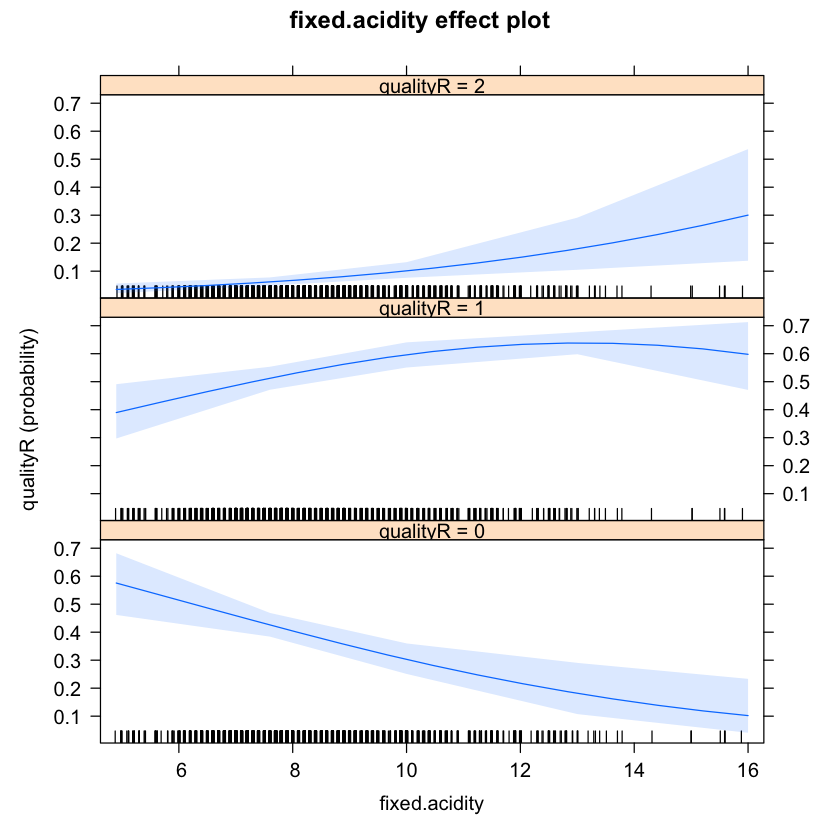

In [100]:
Effect(focal.predictors = "fixed.acidity",model)
plot(Effect(focal.predictors = "fixed.acidity",model))

### Volatile Acidity


volatile.acidity effect (probability) for 0
volatile.acidity
     0.12      0.42      0.72         1       1.3 
0.1504244 0.3125280 0.5385786 0.7378275 0.8784311 

volatile.acidity effect (probability) for 1
volatile.acidity
     0.12      0.42      0.72         1       1.3 
0.6337421 0.5906516 0.4213429 0.2451508 0.1148697 

volatile.acidity effect (probability) for 2
volatile.acidity
      0.12       0.42       0.72          1        1.3 
0.21583345 0.09682043 0.04007847 0.01702170 0.00669919 

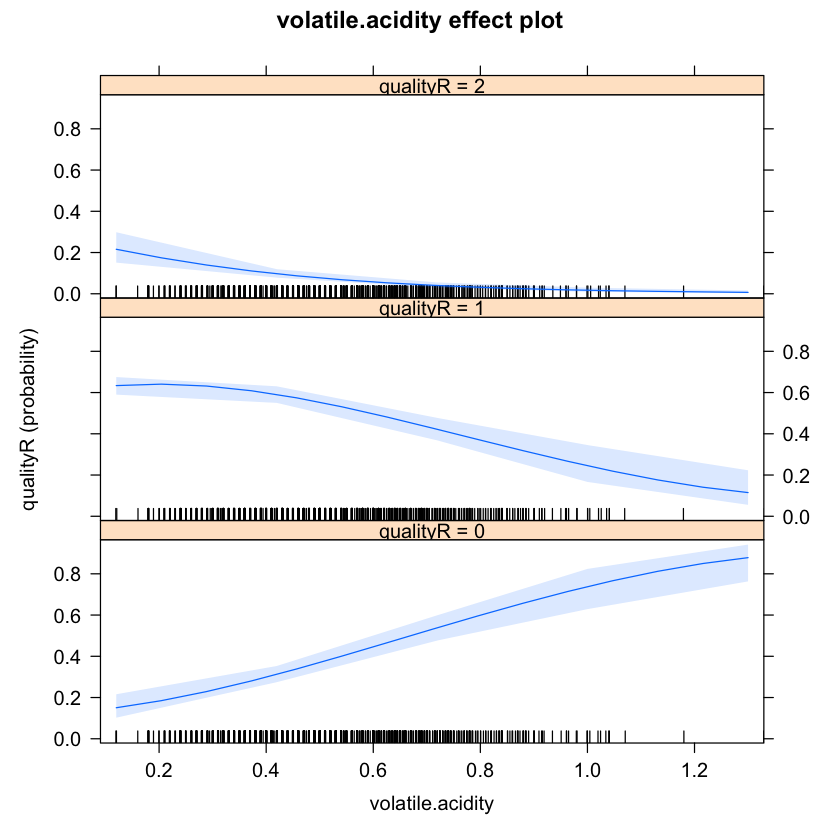

In [101]:
Effect(focal.predictors = "volatile.acidity",model)
plot(Effect(focal.predictors = "volatile.acidity",model))

### Citric Acid


citric.acid effect (probability) for 0
citric.acid
        0       0.2       0.4       0.6       0.8 
0.3428606 0.3750390 0.4083607 0.4425466 0.4772856 

citric.acid effect (probability) for 1
citric.acid
        0       0.2       0.4       0.6       0.8 
0.5717142 0.5498517 0.5256900 0.4996169 0.4720467 

citric.acid effect (probability) for 2
citric.acid
         0        0.2        0.4        0.6        0.8 
0.08542519 0.07510929 0.06594931 0.05783658 0.05066770 

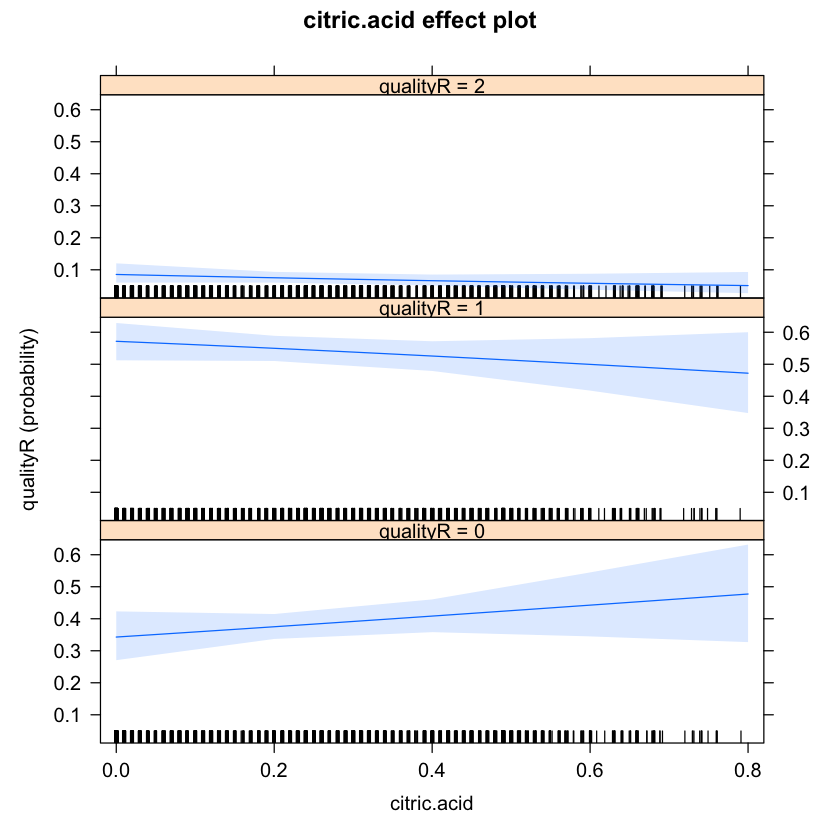

In [102]:
Effect(focal.predictors = "citric.acid",model)
plot(Effect(focal.predictors = "citric.acid",model))

### Residual Sugar


residual.sugar effect (probability) for 0
residual.sugar
       0.9          5          8         10         20 
0.43632704 0.31646365 0.24119096 0.19831046 0.06595697 

residual.sugar effect (probability) for 1
residual.sugar
      0.9         5         8        10        20 
0.5044451 0.5883006 0.6258712 0.6371047 0.5257124 

residual.sugar effect (probability) for 2
residual.sugar
       0.9          5          8         10         20 
0.05922789 0.09523574 0.13293780 0.16458480 0.40833068 

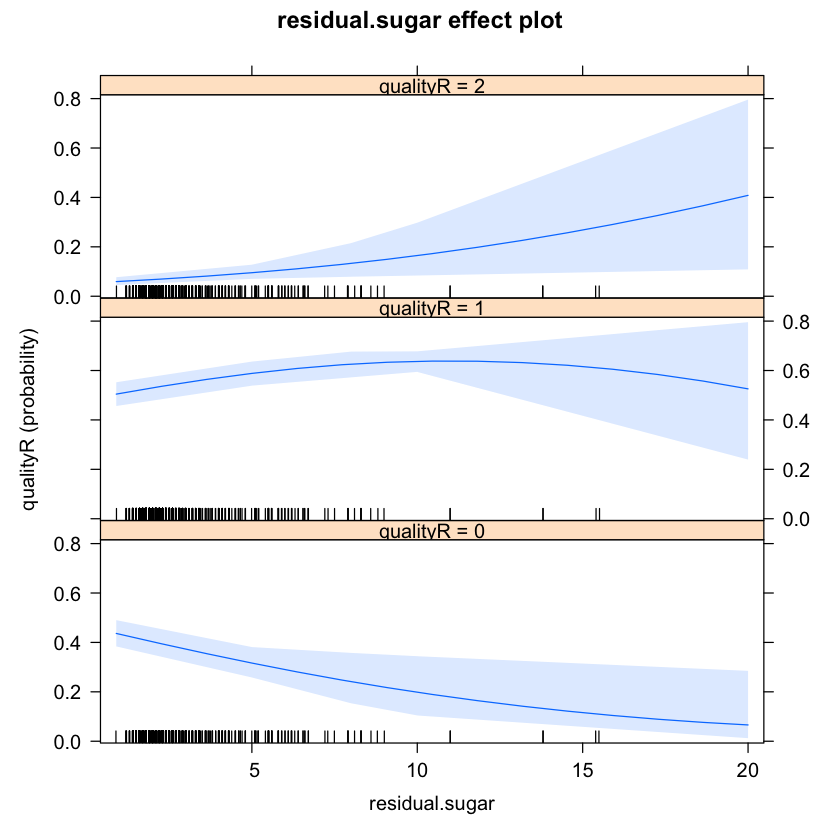

In [104]:
Effect(focal.predictors = "residual.sugar",model)
plot(Effect(focal.predictors = "residual.sugar",model))

### Chlorides


chlorides effect (probability) for 0
chlorides
       0.01         0.2         0.3         0.5         0.6 
0.006393624 0.033943836 0.079067827 0.338897397 0.556068864 

chlorides effect (probability) for 1
chlorides
     0.01       0.2       0.3       0.5       0.6 
0.8705700 0.9410061 0.9105265 0.6593446 0.4432109 

chlorides effect (probability) for 2
chlorides
        0.01          0.2          0.3          0.5          0.6 
0.1230364234 0.0250500509 0.0104056661 0.0017580099 0.0007202097 

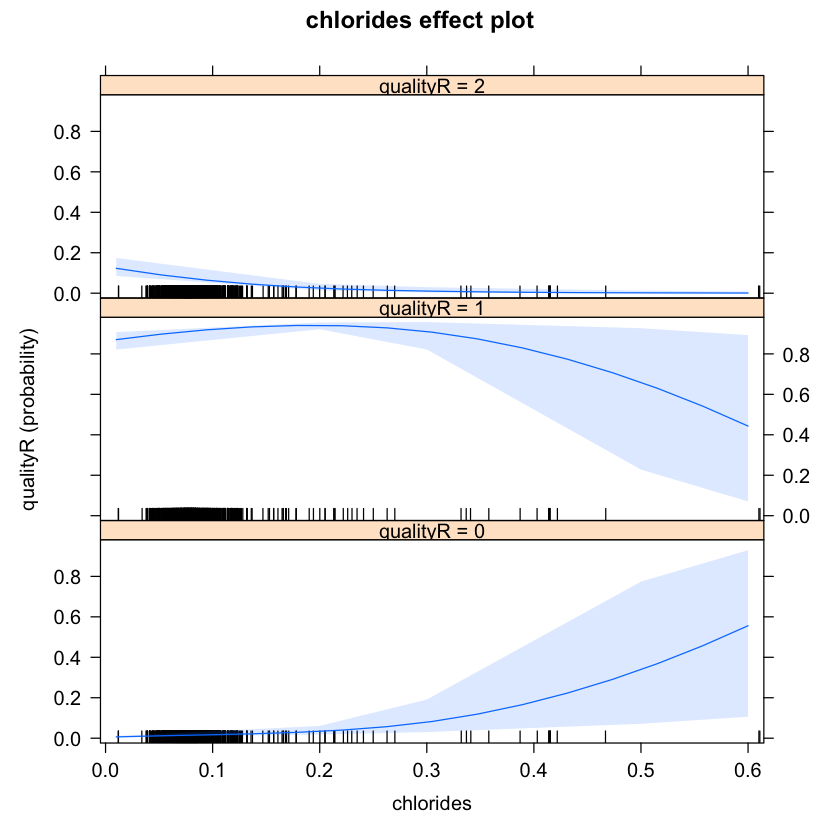

In [66]:
Effect(focal.predictors = "chlorides",model)
plot(Effect(focal.predictors = "chlorides",model))

### Free Sulfur Dioxide


free.sulfur.dioxide effect (probability) for 0
free.sulfur.dioxide
        1        20        30        50        70 
0.4237779 0.3762330 0.3520754 0.3060504 0.2635942 

free.sulfur.dioxide effect (probability) for 1
free.sulfur.dioxide
        1        20        30        50        70 
0.5140760 0.5490106 0.5656217 0.5944450 0.6165736 

free.sulfur.dioxide effect (probability) for 2
free.sulfur.dioxide
         1         20         30         50         70 
0.06214604 0.07475640 0.08230285 0.09950463 0.11983222 

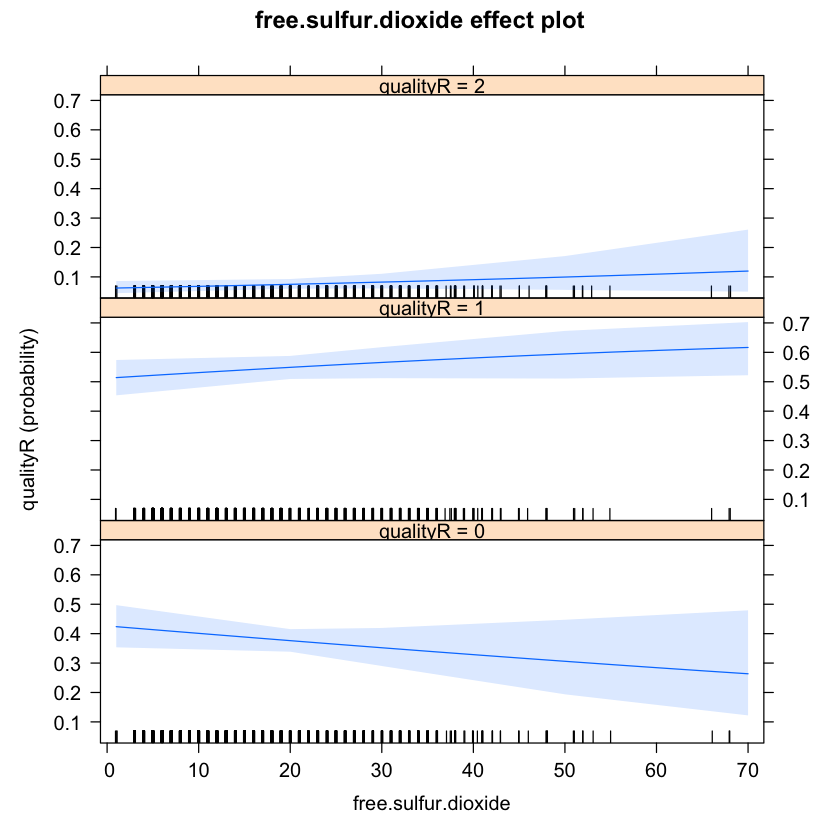

In [105]:
Effect(focal.predictors = "free.sulfur.dioxide",model)
plot(Effect(focal.predictors = "free.sulfur.dioxide",model))

### Total Sulfur Dioxide


total.sulfur.dioxide effect (probability) for 0
total.sulfur.dioxide
         6         80        100        200        300 
0.01067861 0.01457942 0.01585581 0.02407693 0.03640297 

total.sulfur.dioxide effect (probability) for 1
total.sulfur.dioxide
        6        80       100       200       300 
0.9121382 0.9279106 0.9310830 0.9406217 0.9402578 

total.sulfur.dioxide effect (probability) for 2
total.sulfur.dioxide
         6         80        100        200        300 
0.07718324 0.05750995 0.05306119 0.03530132 0.02333926 

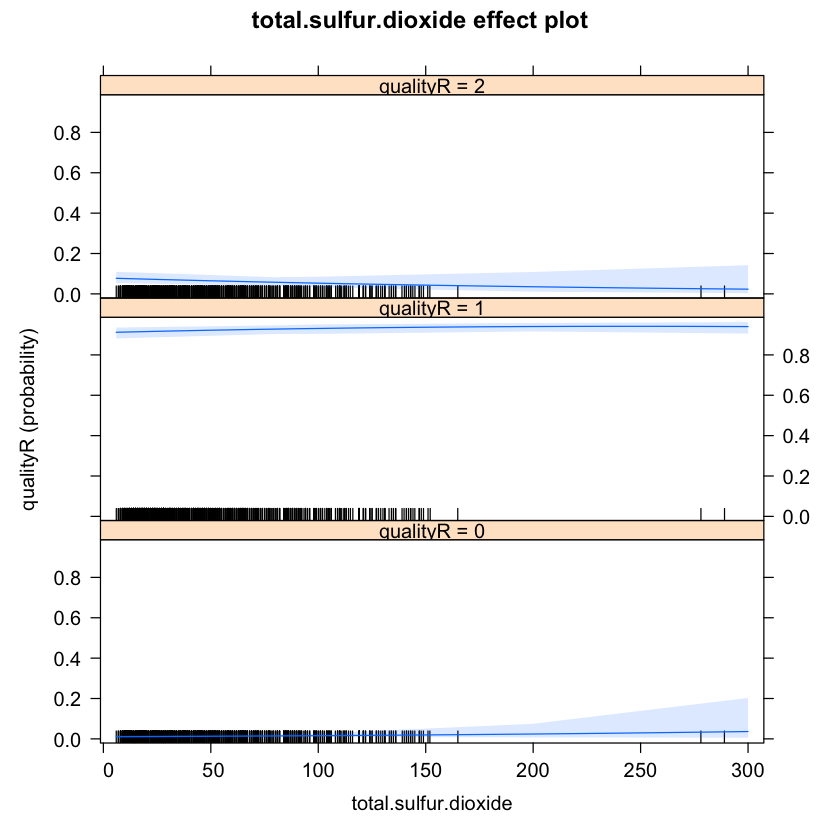

In [68]:
Effect(focal.predictors = "total.sulfur.dioxide",model)
plot(Effect(focal.predictors = "total.sulfur.dioxide",model))

### Density


density effect (probability) for 0
density
   0.9901    0.9935    0.9969         1     1.004 
0.1974656 0.2851506 0.3927188 0.5011566 0.6394656 

density effect (probability) for 1
density
   0.9901    0.9935    0.9969         1     1.004 
0.6372164 0.6059794 0.5372033 0.4525791 0.3337930 

density effect (probability) for 2
density
    0.9901     0.9935     0.9969          1      1.004 
0.16531798 0.10886996 0.07007797 0.04626425 0.02674142 

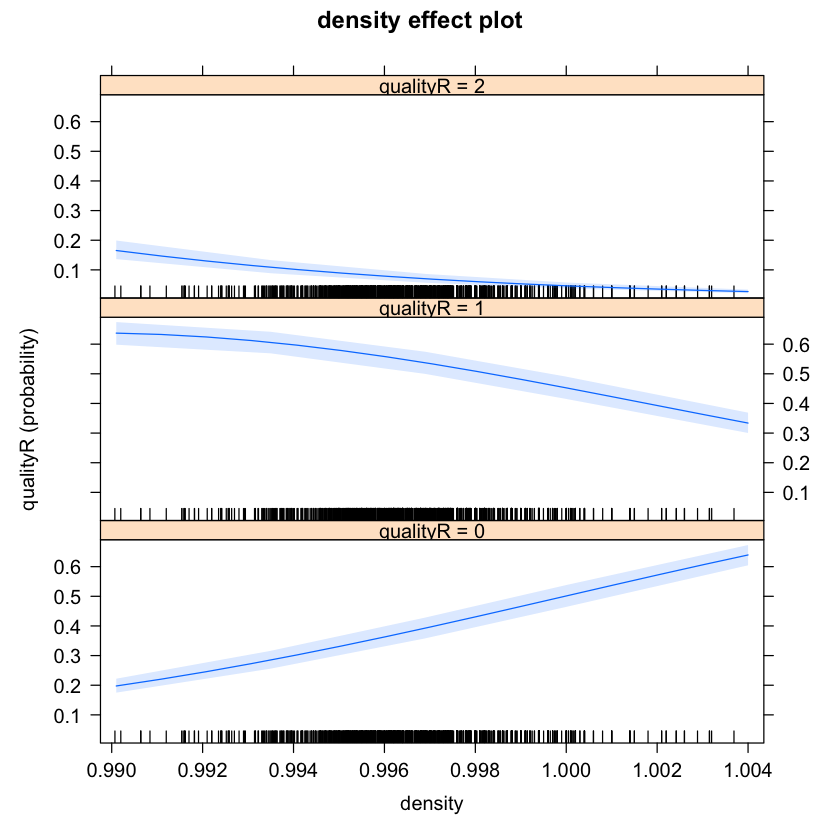

In [106]:
Effect(focal.predictors = "density",model)
plot(Effect(focal.predictors = "density",model))

### pH


pH effect (probability) for 0
pH
        2.7         3.1         3.4         3.7           4 
0.001014512 0.005305499 0.018168836 0.060328184 0.182164511 

pH effect (probability) for 1
pH
      2.7       3.1       3.4       3.7         4 
0.5283748 0.8499380 0.9353146 0.9258050 0.8137988 

pH effect (probability) for 2
pH
        2.7         3.1         3.4         3.7           4 
0.470610725 0.144756509 0.046516572 0.013866804 0.004036736 

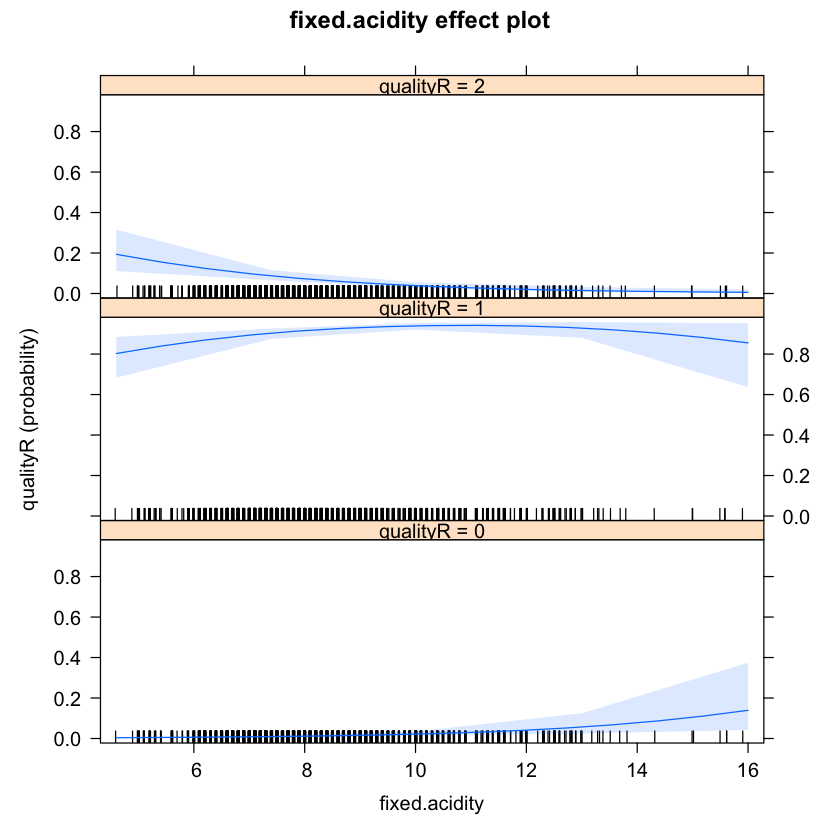

In [72]:
Effect(focal.predictors = "pH",model)
plot(Effect(focal.predictors = "fixed.acidity",model))

### Sulphates 


sulphates effect (probability) for 0
sulphates
       0.39        0.78         1.2         1.6           2 
0.606221960 0.296874579 0.094882625 0.027059633 0.007324816 

sulphates effect (probability) for 1
sulphates
     0.39      0.78       1.2       1.6         2 
0.3630940 0.5996475 0.5877651 0.3362821 0.1241770 

sulphates effect (probability) for 2
sulphates
     0.39      0.78       1.2       1.6         2 
0.0306840 0.1034779 0.3173523 0.6366583 0.8684982 

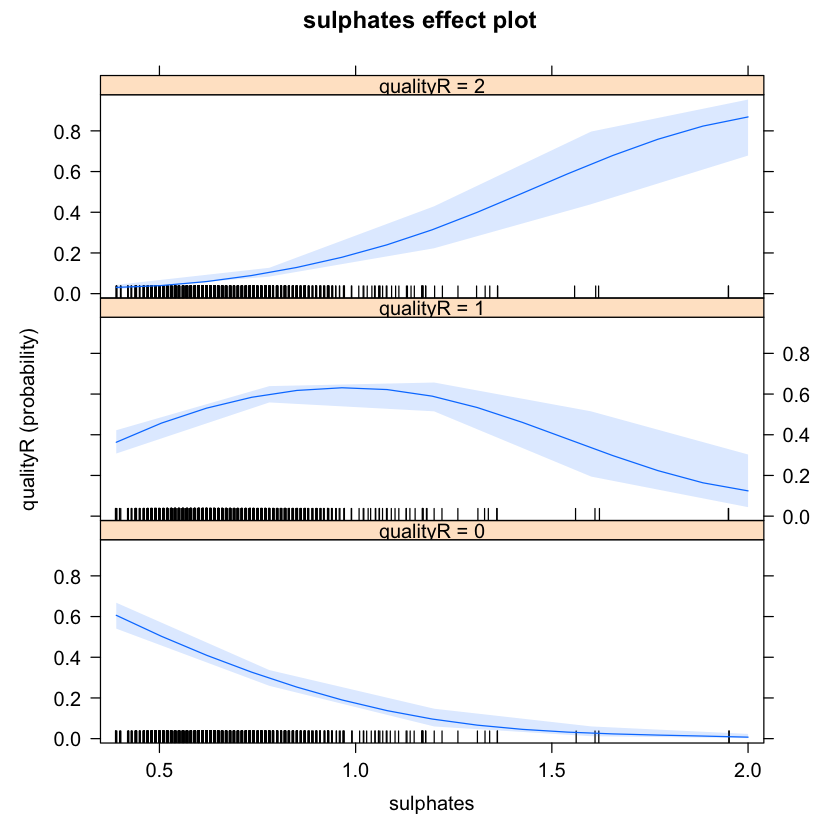

In [107]:
Effect(focal.predictors = "sulphates",model)
plot(Effect(focal.predictors = "sulphates",model))

### Alcohol


alcohol effect (probability) for 0
alcohol
         8.4           10           12           13           15 
1.100732e-01 2.048170e-02 2.261531e-03 7.457238e-04 8.089082e-05 

alcohol effect (probability) for 1
alcohol
       8.4         10         12         13         15 
0.88268075 0.93813031 0.71289786 0.45180143 0.08215834 

alcohol effect (probability) for 2
alcohol
        8.4          10          12          13          15 
0.007246012 0.041387990 0.284840614 0.547452842 0.917760774 

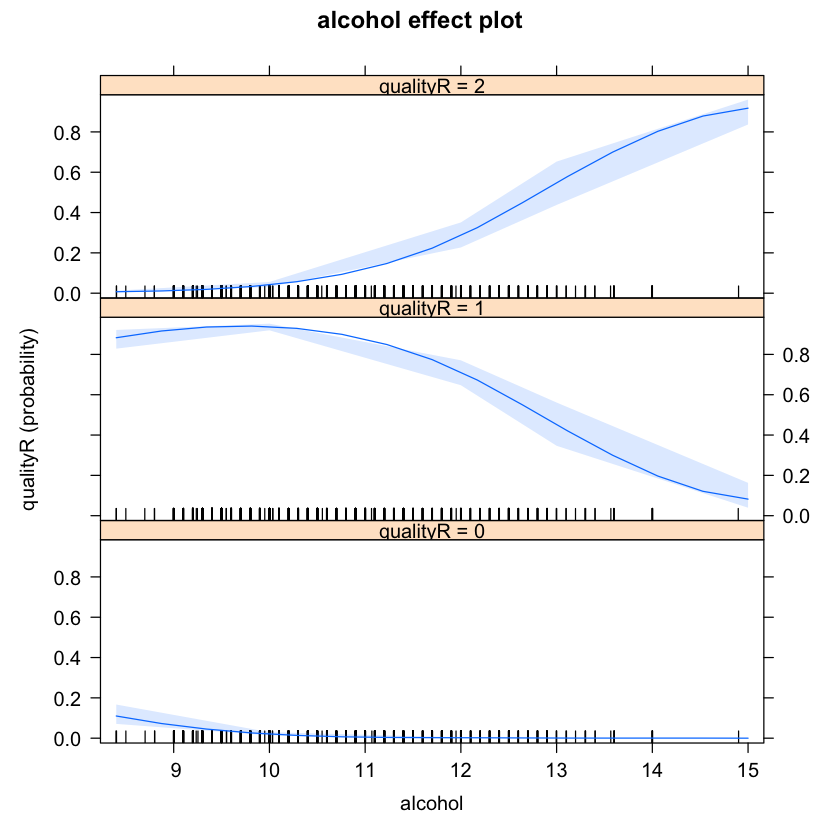

In [74]:
Effect(focal.predictors = "alcohol",model)
plot(Effect(focal.predictors = "alcohol",model))